In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [21]:
data = {}
for fname in os.listdir("val"):
    if not fname.endswith(".csv"):
        continue
    
    fname_attr = fname[4:].split("_")
    exp_name = fname_attr[0] + "_" + fname_attr[1]
    df = pd.read_csv("val/" + fname, usecols=["Step", "Value"])
    data[exp_name] = [df]

for fname in os.listdir("epochs"):
    if not fname.endswith(".csv"):
        continue
    
    fname_attr = fname[4:].split("_")
    exp_name = fname_attr[0] + "_" + fname_attr[1]
    df = pd.read_csv("epochs/" + fname, usecols=["Step", "Value"])
    data[exp_name].append(df)

In [28]:
df[1]

,Step,Value
0,199,0.0
1,299,0.0
2,349,0.0
3,449,1.0
4,549,1.0
...,...,...
995,74999,209.0
996,75049,209.0
997,75099,209.0
998,75149,209.0


In [29]:
75180/210

358.0

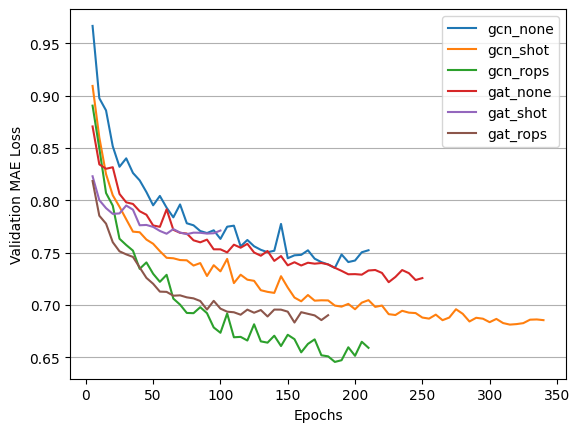

In [37]:
fig = plt.figure()
for i in ["gcn_none", "gcn_shot", "gcn_rops", "gat_none", "gat_shot", "gat_rops"]:
    df = data[i]
    plt.plot(df[0]["Step"] / 358, df[0]["Value"], label=i)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE Loss")
plt.grid(axis="y")
plt.legend()
plt.savefig("val_loss.png")

In [45]:
test_loss = {}
for fname in os.listdir("test"):
    if not fname.endswith(".csv"):
        continue
    
    fname_attr = fname[4:].split("_")
    exp_name = fname_attr[0] + "_" + fname_attr[1]
    df = pd.read_csv("test/" + fname, usecols=["Step", "Value"]).iloc[-1]["Value"]
    test_loss[exp_name] = df

In [46]:
test_loss

{'gcn_rops': 0.6718989610671997,
 'gat_rops': 0.6858371496200562,
 'gcn_none': 0.7488005757331848,
 'gat_shot': 0.7642568349838257,
 'gat_none': 0.7217165231704712,
 'gcn_shot': 0.6849813461303711}